<a href="https://colab.research.google.com/github/E-wave112/ml_proj_2/blob/master/synthatanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  int64  
 3   Sex       100000 non-null  int64  
 4   Age       100000 non-null  float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Fare      100000 non-null  float64
 8   Embarked  100000 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 6.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Pclass    100000 non-null  int64  
 1   Name      100000 non-null  int64  
 2   Sex       100000 non-null  int64  
 3   Age       100000 non-null  float64
 4   SibSp     100000 non-null  int64  
 5   Pa

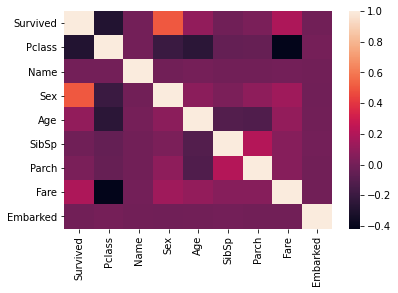

In [8]:
##Sample notebooks related to the synthatic kaggle hackathon 
##rdf baseline val_score 78.481
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# import pyforest
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import KFold,RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
# import lazypredict
# from lazypredict.Supervised import LazyClassifier

#load the required datasets

df = pd.read_csv('/content/drive/MyDrive/synthanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/synthanic/test.csv')
df.drop(['PassengerId','Cabin','Ticket'],axis=1,inplace=True)

##convert certain categorical data to numerical data
df['Sex'].replace('male',10,inplace=True)
df['Sex'].replace('female',20,inplace=True)
df['Embarked'].replace('C',50,inplace=True)
df['Embarked'].replace('S',60,inplace=True)
df['Embarked'].replace('Q',70,inplace=True)
df['Name'] = df['Name'].apply(lambda x:''.join([x for c in x if c.isalnum()]))
int_columns = ['Age','Fare']

##perform imputation on missing values in a numerical column
for col in int_columns:
  df[col].fillna(np.mean(df[col]),inplace=True)
df.fillna(-99999,axis=1,inplace=True)

##encode initially using label encoding
labelencoder = LabelEncoder()

df['Name'] = labelencoder.fit_transform(df['Name'])
##visualize the colinearity of the features
corre = df.corr()
sns.heatmap(corre)

X = df.drop(['Survived'],axis=1)
Y = df['Survived']
stdscale = StandardScaler()

##scale the dataset
X = pd.DataFrame(stdscale.fit_transform(X),columns=X.columns)
print(df.info())

##convert certain categorical data to numerical data
df_test.drop(['PassengerId','Cabin','Ticket'],axis=1,inplace=True)
df_test['Sex'].replace('male',10,inplace=True)
df_test['Sex'].replace('female',20,inplace=True)
df_test['Embarked'].replace('C',50,inplace=True)
df_test['Embarked'].replace('S',60,inplace=True)
df_test['Embarked'].replace('Q',70,inplace=True)
df_test['Name'] = df_test['Name'].apply(lambda x:''.join([x for c in x if c.isalnum()]))

##perform imputation on missing values in a numerical column
for col in int_columns:
  df_test[col].fillna(np.mean(df_test[col]),inplace=True)
df_test.fillna(-99999,axis=1,inplace=True)
df_test['Name'] = labelencoder.fit_transform(df_test['Name'])

##scale the dataset
A = stdscale.fit_transform(df_test)
print(df_test.info())

##using the random forest
rnd_clf = RandomForestClassifier(min_samples_leaf=1, n_estimators =400,min_samples_split=4,max_leaf_nodes = 10,
                            max_features= 'auto',max_depth=9,criterion = 'gini',
            bootstrap=True,oob_score=True, n_jobs=-1,random_state=2,class_weight='balanced')
cv = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, Y_train, Y_test = X.iloc[train_index], X.iloc[test_index], Y.iloc[train_index], Y.iloc[test_index]
    rnd_clf.fit(X_train, Y_train)
    print(cross_val_score(rnd_clf, X, Y, cv=5))

rnd_clf.fit(X,Y)

pred = rnd_clf.predict(A)
##get the first ten predicted values
print(pred[:10])
##fill in the pred values in the submission csv file
sample_submission = pd.read_csv('/content/drive/MyDrive/synthanic/sample_submission.csv')
sample_submission['Survived'] = pred
sample_submission.to_csv('/content/drive/MyDrive/synthanic/first.csv',index=False)


In [ ]:
##trying out boosting algorithms val_score = 78.336
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# import pyforest
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report,recall_score,precision_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import KFold,RandomizedSearchCV,train_test_split,cross_val_score
import lightgbm as lgb


#load the required datasets

df = pd.read_csv('/content/drive/MyDrive/synthanic/train.csv')
df.drop(['PassengerId','Cabin','Ticket'],axis=1,inplace=True)

##convert certain categorical data to numerical data
df['Sex'].replace('male',10,inplace=True)
df['Sex'].replace('female',20,inplace=True)
df['Embarked'].replace('C',50,inplace=True)
df['Embarked'].replace('S',60,inplace=True)
df['Embarked'].replace('Q',70,inplace=True)
df['Name'] = df['Name'].apply(lambda x:''.join([x for c in x if c.isalnum()]))
int_columns = ['Age','Fare']

##perform imputation on missing values in a numerical column
for col in int_columns:
  df[col].fillna(np.mean(df[col]),inplace=True)
df.fillna(-99999,axis=1,inplace=True)

##encode initially using label encoding
labelencoder = LabelEncoder()

df['Name'] = labelencoder.fit_transform(df['Name'])
##visualize the colinearity of the features
corre = df.corr()
sns.heatmap(corre)

X = df.drop(['Survived'],axis=1)
Y = df['Survived']
stdscale = StandardScaler()

##scale the dataset
X = pd.DataFrame(stdscale.fit_transform(X),columns=X.columns)
print(df.info())

#load the test set
df_test = pd.read_csv('/content/drive/MyDrive/synthanic/test.csv')
##convert certain categorical data to numerical data

df_test.drop(['PassengerId','Cabin','Ticket'],axis=1,inplace=True)
df_test['Sex'].replace('male',10,inplace=True)
df_test['Sex'].replace('female',20,inplace=True)
df_test['Embarked'].replace('C',50,inplace=True)
df_test['Embarked'].replace('S',60,inplace=True)
df_test['Embarked'].replace('Q',70,inplace=True)
##strip special characters from each Name column instances
df_test['Name'] = df_test['Name'].apply(lambda x:''.join([x for c in x if c.isalnum()]))

##perform imputation on missing values in a numerical column
for col in int_columns:
  df_test[col].fillna(np.mean(df_test[col]),inplace=True)
df_test.fillna(-99999,axis=1,inplace=True)
df_test['Name'] = labelencoder.fit_transform(df_test['Name'])

##scale the dataset
A = stdscale.fit_transform(df_test)
print(df_test.info())

##using the xgboost forest
lgb_clf = lgb.LGBMClassifier(extra_trees=True,boost='dart',path_smooth =2,num_leaves = 70,num_iterations= 200, min_samples_leaf= 300, min_gain_to_split=4, max_depth=10, max_bins =200,
                             learning_rate = 0.1, lambda_li = 5, lambda_l2 = 4, early_stoppping_round= 40, bagging_freq= 4, bagging_fraction= 0.7)

cv = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, Y_train, Y_test = X.iloc[train_index], X.iloc[test_index], Y.iloc[train_index], Y.iloc[test_index]
    lgb_clf.fit(X_train, Y_train)
    print(cross_val_score(lgb_clf, X, Y, cv=5))

    
lgb_clf.fit(X,Y)

pred = lgb_clf.predict(A)
##get the first ten predicted values
print(pred[:10])
##fill in the pred values in the submission csv file
sample_submission = pd.read_csv('/content/drive/MyDrive/synthanic/sample_submission.csv')
sample_submission['Survived'] = pred
sample_submission.to_csv('/content/drive/MyDrive/synthanic/second.csv',index=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  int64  
 3   Sex       100000 non-null  int64  
 4   Age       100000 non-null  float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Fare      100000 non-null  float64
 8   Embarked  100000 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 6.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Pclass    100000 non-null  int64  
 1   Name      100000 non-null  int64  
 2   Sex       100000 non-null  int64  
 3   Age       100000 non-null  float64
 4   SibSp     100000 non-null  int64  
 5   Pa